<a href="https://colab.research.google.com/github/chipsalliance/silicon-notebooks/blob/main/digital-inverter-openlane-gf180mcu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital inverter with OpenLane

```
Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0
```

Run a simple digital inverter design thru the [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) GDS to RTL flow targeting the [open source GF180MCU PDK](https://github.com/google/gf180mcu-pdk/).

In [ ]:
#@title Install dependencies {display-mode: "form"}
#@markdown - Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda).

openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.gf180mcuc={open_pdks_version}
!python -m pip install gdstk gdstk
PATH = os.environ['PATH']
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}


## Write verilog

In [ ]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

## Write configuration

[Documentation](https://openlane.readthedocs.io/en/latest/reference/configuration.html)

In [ ]:
%%writefile config.json
{
    "DESIGN_NAME": "inverter",
    "VERILOG_FILES": "dir::inverter.v",
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 34.5 57.12",
    "PL_TARGET_DENSITY": 0.75,
    "PL_RANDOM_GLB_PLACEMENT": true,
    "RUN_CTS": false
}

## Run OpenLane Flow
[OpenLane](https://openlane.readthedocs.io/en/latest/) is an automated [RTL](https://en.wikipedia.org/wiki/Register-transfer_level) to [GDSII](https://en.wikipedia.org/wiki/GDSII) flow based on several components including [OpenROAD](https://theopenroadproject.org/), [Yosys](https://yosyshq.net/yosys/), [Magic](http://www.opencircuitdesign.com/magic/), [Netgen](http://opencircuitdesign.com/netgen/) and custom methodology scripts for design exploration and optimization targeting [open source PDKs](https://github.com/google/open-source-pdks).

![img](https://openlane.readthedocs.io/en/latest/_images/flow_v1.png)

In [4]:
%env PDK=gf180mcuC
!flow.tcl -design .

OpenLane 2022.11.02_0_ga0b19fa-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: not enough values to unpack (expected 3, got 1)
child process exited abnormally
[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: gf180mcuC
[INFO]: Standard Cell Library: gf180mcu_fd_sc_mcu7t5v0
[INFO]: Optimization Standard Cell Library: gf180mcu_fd_sc_mcu7t5v0
[INFO]: Run Directory: /content/runs/RUN_2022.11.11_06.47.03
[INFO]: Preparing LEF files for the nom corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2022.11.11_06.47.03/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: runs/RUN_2022.11.11_06.47.03/logs/synthesis/2-sta.log)...
[STEP 3]
[INFO]: Running Initial Floorplanning (log: runs/RUN_2022.11.11_06

## Display layout

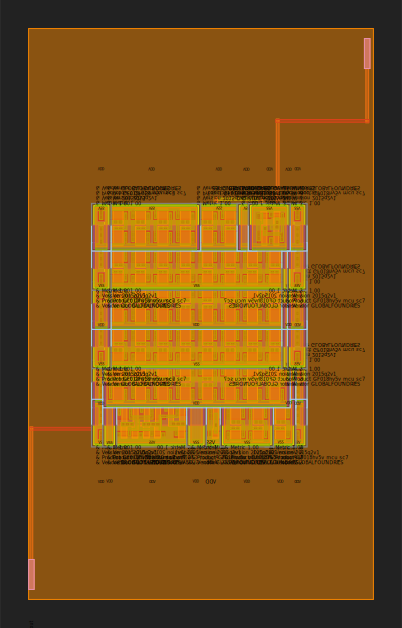

In [5]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

## Metrics

[Documentation](https://openlane.readthedocs.io/en/latest/reference/datapoint_definitions.html)


In [6]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(reports[-1])
df.transpose()

0
design                                     /content
design_name                                inverter
config                      RUN_2022.11.11_06.47.03
flow_status                          flow completed
total_runtime                            0h0m23s0ms
routed_runtime                           0h0m17s0ms
(Cell/mm^2)/Core_Util                          -2.0
DIEAREA_mm^2                               0.007883
CellPer_mm^2                                     -1
OpenDP_Util                                      -1
Peak_Memory_Usage_MB                         452.69
cell_count                                       -1
tritonRoute_violations                            0
Short_violations                                  0
MetSpc_violations                                 0
OffGrid_violations                                0
MinHole_violations                                0
Other_violations                                  0
Magic_violations                                  0
antenna_violations                               -1
lvs_total_errors                                 -1
cvc_total_errors                                 -1
klayout_violations                               -1
wire_length                                      79
vias                                             14
wns                                             0.0
pl_wns                                           -1
optimized_wns                                   0.0
fastroute_wns                                   0.0
spef_wns                                        0.0
tns                                             0.0
pl_tns                                           -1
optimized_tns                                   0.0
fastroute_tns                                   0.0
spef_tns                                        0.0
HPWL                                             -1
routing_layer1_pct                              0.0
routing_layer2_pct                             2.33
routing_layer3_pct                             1.39
routing_layer4_pct                              0.0
routing_layer5_pct                              0.0
routing_layer6_pct                               -1
wires_count                                       2
wire_bits                                         2
public_wires_count                                2
public_wire_bits                                  2
memories_count                                    0
memory_bits                                       0
processes_count                                   0
cells_pre_abc                                     1
AND                                               0
DFF                                               0
NAND                                              0
NOR                                               0
OR                                                0
XOR                                               0
XNOR                                              0
MUX                                               0
inputs                                            1
outputs                                           1
level                                             1
EndCaps                                          12
TapCells                                          0
Diodes                                            0
Total_Physical_Cells                             12
CoreArea_um^2                              487.3344
power_slowest_internal_uW                        -1
power_slowest_switching_uW                       -1
power_slowest_leakage_uW                         -1
power_typical_internal_uW                        -1
power_typical_switching_uW                       -1
power_typical_leakage_uW                         -1
power_fastest_internal_uW                        -1
power_fastest_switching_uW                       -1
power_fastest_leakage_uW                         -1
critical_path_ns                                 -1
suggested_clock_period                        